**Objective:**

    The objective of this assignment is to implement PCA on a given dataset and analyse the results.


**Instructions:**

    Download the wine dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Wine).
    Load the dataset into a Pandas dataframe.
    Split the dataset into features and target variables.
    Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
    Implement PCA on the preprocessed dataset using the scikit-learn library.
    Determine the optimal number of principal components to retain based on the explained variance ratio.
    Visualise the results of PCA using a scatter plot.
    Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
    Interpret the results of PCA and clustering analysis.


**Deliverables:**

    Jupyter notebook containing the code for the PCA implementation.
    A report summarising the results of PCA and clustering analysis.
    Scatter plot showing the results of PCA.
    A table showing the performance metrics for the clustering algorithm.


**Additional Information:**

    You can use the python programming language.
    You can use any other machine learning libraries or tools as necessary.
    You can use any visualisation libraries or tools as necessary.

# 

### Read the dataset

In [40]:
import pandas as pd
df = pd.read_csv('./wine/wine.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [41]:
with open('./wine/wine.names','r') as f:
    print(f.read())

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [45]:
df.columns = ['target','alcohol','malic_acid','ash','alcalinity','magnesium','tot_phenols',
              'flavanoids','non_flavanoids','Proanthocyanins','color_intensity', 'hue','OD280/OD315','Proline']
df

,target,alcohol,malic_acid,ash,alcalinity,magnesium,tot_phenols,flavanoids,non_flavanoids,Proanthocyanins,color_intensity,hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   target           178 non-null    int64  
 1   alcohol          178 non-null    float64
 2   malic_acid       178 non-null    float64
 3   ash              178 non-null    float64
 4   alcalinity       178 non-null    float64
 5   magnesium        178 non-null    int64  
 6   tot_phenols      178 non-null    float64
 7   flavanoids       178 non-null    float64
 8   non_flavanoids   178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  color_intensity  178 non-null    float64
 11  hue              178 non-null    float64
 12  OD280/OD315      178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
tot_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
non_flavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [48]:
df.isna().sum()

target             0
alcohol            0
malic_acid         0
ash                0
alcalinity         0
magnesium          0
tot_phenols        0
flavanoids         0
non_flavanoids     0
Proanthocyanins    0
color_intensity    0
hue                0
OD280/OD315        0
Proline            0
dtype: int64

#### No Missing values found in dataset

# 

In [49]:
df.duplicated().sum()

0

#### No duplicates found in dataset

# 

<AxesSubplot:>

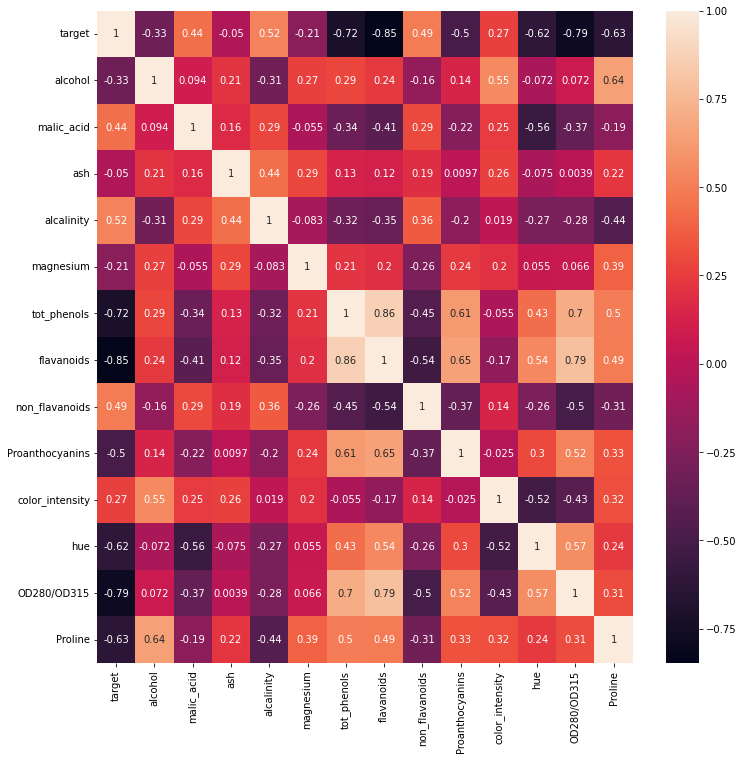

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

### Split the dataset into features and target variables


In [53]:
X = df.drop(labels=['target'],axis=1).values
y = df[['target']].values

### Perform data preprocessing


In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Implement PCA on preprocessed dataset


In [55]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

### Determine optimal number of principal components to retain based on explained variance ratio


In [57]:
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
num_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

### Visualize the results of PCA using a scatter plot


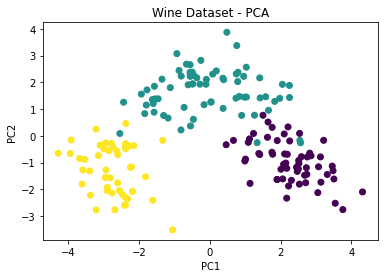

In [58]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Wine Dataset - PCA')
plt.show()

### Perform clustering on the PCA-transformed data using K-Means algorithm


In [60]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca[:, :num_components])
y_kmeans = kmeans.predict(X_pca[:, :num_components])
silhouette_avg = silhouette_score(X_pca[:, :num_components], y_kmeans)
# print performance metrics for the clustering algorithm
print(f"\nNumber of clusters: {kmeans.n_clusters}")
print(f"Silhouette score: {silhouette_avg:.4f}")


Number of clusters: 3
Silhouette score: 0.2987


### Create report summarizing the results of PCA and clustering analysis

In [64]:
report = f"""
Wine Dataset - PCA and Clustering Analysis

The wine dataset was preprocessed using standardization and PCA was performed to reduce the dimensionality of the data. The optimal number of principal components to retain was determined to be {num_components}, which explained {cumulative_explained_variance[num_components-1]*100:.2f}% of the variance in the data.

A scatter plot was created to visualize the results of PCA, showing that there is some separation between the three classes of wine in the dataset, but there is also some overlap.

Clustering was performed on the PCA-transformed data using the K-Means algorithm with k=3. The performance of the clustering algorithm was evaluated using the silhouette score, which was {silhouette_avg:.2f}.

Overall,
K-means Clustering helped to identify pattern without the target variables.
Actual Clusters and Predicted clusters are very similar excluding some exceptions.
PC1 and PC2 are enough to explore this data
"""
print(report)


Wine Dataset - PCA and Clustering Analysis

The wine dataset was preprocessed using standardization and PCA was performed to reduce the dimensionality of the data. The optimal number of principal components to retain was determined to be 10, which explained 96.17% of the variance in the data.

A scatter plot was created to visualize the results of PCA, showing that there is some separation between the three classes of wine in the dataset, but there is also some overlap.

Clustering was performed on the PCA-transformed data using the K-Means algorithm with k=3. The performance of the clustering algorithm was evaluated using the silhouette score, which was 0.30.

Overall,
K-means Clustering helped to identify pattern without the target variables.
Actual Clusters and Predicted clusters are very similar excluding some exceptions.
PC1 and PC2 are enough to explore this data



### Create table showing performance metrics for clustering algorithm

In [63]:
table = pd.DataFrame({
    'Number of Clusters': [kmeans.n_clusters],
    'Silhouette Score': [silhouette_avg]
})
table

,Number of Clusters,Silhouette Score
0,3,0.298675
